In [1]:
# 📌 Cell 1: Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
# 📌 Cell 2: Generate Simple House Price Dataset
np.random.seed(42)  # reproducibility
n_samples = 100

size = np.random.normal(2000, 300, n_samples)   # house size (sqft)
bedrooms = np.random.randint(1, 5, n_samples)  # number of bedrooms

# Target (house price)
price = 50000 + 150 * size + 20000 * bedrooms + np.random.normal(0, 20000, n_samples)

# Put into DataFrame
house_data = pd.DataFrame({
    'size': size,
    'bedrooms': bedrooms,
    'price': price
})

house_data.head()


,size,bedrooms,price
0,2149.014246,1,376687.071039
1,1958.520710,2,377336.876123
2,2194.306561,1,415416.328562
3,2456.908957,1,413919.057210
4,1929.753988,3,404012.296830


In [3]:

# 📌 Cell 3: Define Features (X) and Target (y)
X = house_data[['size', 'bedrooms']]  # input features
y = house_data['price']               # target (house price)


In [4]:
# 📌 Cell 4: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training samples:", len(X_train))
print("Testing samples:", len(X_test))


Training samples: 80
Testing samples: 20


In [5]:
# 📌 Cell 5: Train Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

print("Model trained successfully!")


Model trained successfully!


In [7]:
# 📌 Cell 6: Make Predictions
print("Making predictions on test set...")
print("Trained x: ", X_train)
print("Test x: ", X_test )
y_pred = model.predict(X_test)

print("First 5 Predictions:", y_pred[:5])
print("First 5 Actual:", list(y_test[:5]))


Making predictions on test set...
Trained x:             size  bedrooms
55  2279.384036         4
88  1841.071939         4
26  1654.701927         1
42  1965.305515         3
69  1806.464074         4
..          ...       ...
60  1856.247729         4
71  2461.410970         1
14  1482.524650         1
92  1789.384072         1
51  1884.475316         3

[80 rows x 2 columns]
Test x:             size  bedrooms
83  1844.518935         2
53  2183.502887         3
70  2108.418682         1
45  1784.046737         1
44  1556.443403         2
39  2059.058371         4
22  2020.258461         2
80  1934.098434         3
10  1860.974692         2
0   2149.014246         1
18  1727.592777         1
30  1819.488016         1
73  2469.393097         3
33  1682.686721         2
90  2029.123265         4
4   1929.753988         3
76  2026.114120         1
77  1910.297795         3
12  2072.588681         4
31  2555.683455         3
First 5 Predictions: [369934.67114754 438534.05211326 391070.483

In [8]:
# 📌 Cell 7: Evaluate the Model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("📊 Linear Regression Results:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.4f}")


📊 Linear Regression Results:
Mean Squared Error: 613415358.71
R² Score: 0.8398


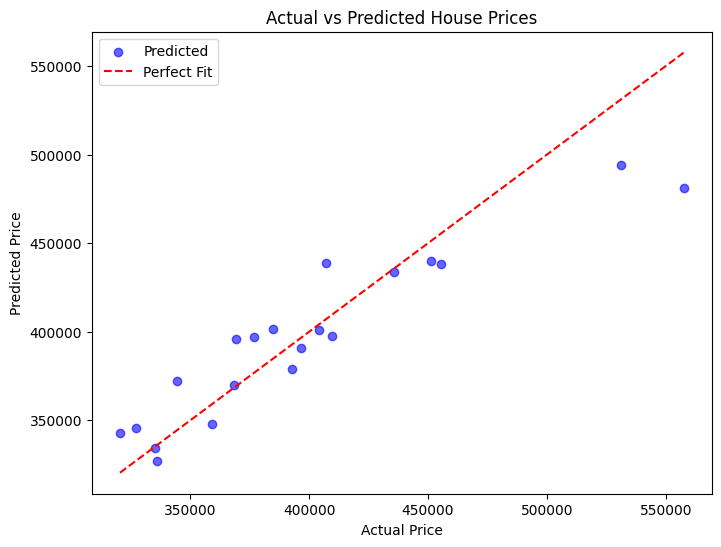

In [9]:
# 📌 Cell 8: Visualize Actual vs Predicted Prices
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color="blue", alpha=0.6, label="Predicted")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--", label="Perfect Fit")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Prices")
plt.legend()
plt.show()
